In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import math
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor

In [2]:
df = pd.read_csv('Ass4-data/Part_1-regression/diamonds.csv', index_col=0)

In [3]:
# print df shape

df.shape

(53940, 10)

In [4]:
# get top 5 rows of the dataset

df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [5]:
# get the summary of the dataset and datatypes of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [6]:
totalMissingColumn = df.isnull().sum() #total missing values in dataset

df_length = len(df) #length of dataset
missingValues = (df.isnull().sum()/df_length) * 100 #percentage of missing values in dataset
missingValues = missingValues.sort_values(ascending=False) #sort missing values in descending order
missingValues = missingValues[missingValues > 0] #missing values greater than 0
missingValues = pd.DataFrame(missingValues.values, missingValues.index) #convert to dataframe

print("Missing Values:")
print(totalMissingColumn)
print("\nFeatures with percentage missing:")
print(missingValues)

Missing Values:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

Features with percentage missing:
Empty DataFrame
Columns: [0]
Index: []


In [7]:
# print value counts for each column

for col in df.columns:
    print(df[col].value_counts())
    print()

carat
0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: count, Length: 273, dtype: int64

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

depth
62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
71.3       1
44.0       1
53.0       1
53.1       1
54.7       1
Name: count, Length: 184, dtype: int64

table
56.0    9881
57.0    9724
58.0    8369
59.0    6572
55.0    6268
        ... 
51.6       1
63.5       1
43.0       1
62.4       1
61.6       1
Name: count, Length: 127, dtype: int64

x
4.37     448
4.34     437
4.33     429
4.38     

In [8]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [9]:
# get understanding of numerical and categorical features in dataset

n_instances = df.shape[0] #num instances
n_features = df.shape[1] # num features

numerical_int = df.select_dtypes(include='number')  # select num features
categorical_int = df.select_dtypes(include='object') # select cat features

numerical_cnt = numerical_int.shape[1]  # num num features
categorical_cnt = categorical_int.shape[1] # num cat features

print("Num Instances: ", n_instances)
print("Num Features: ", n_features)
print("Num Categorical: ", categorical_cnt)
print("Num Numerical: ", numerical_cnt)

Num Instances:  53940
Num Features:  10
Num Categorical:  3
Num Numerical:  7


In [10]:
# identify numerical and categorical feature names

print("Numerical Columns:")
print(numerical_int.columns)
print("\nCategorical Columns:")
print(categorical_int.columns)

Numerical Columns:
Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

Categorical Columns:
Index(['cut', 'color', 'clarity'], dtype='object')


In [11]:
categorical_features = ['cut', 'clarity', 'color']
ordinal_features = ['cut', 'clarity']
nominal_features = ['color']
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [12]:
# nominal features - One Hot Encoding
# ordinal features - Ordinal Encoding
# numerical features - MinMax Scaling

mms = MinMaxScaler()
df[numerical_features] = mms.fit_transform(df[numerical_features])

ohe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df[ordinal_features] = ohe.fit_transform(df[ordinal_features])

ohe = OneHotEncoder(sparse_output=False)  
encoded_nominal_features = ohe.fit_transform(df[nominal_features])
encoded_nominal_features = pd.DataFrame(
    encoded_nominal_features, 
    columns=ohe.get_feature_names_out(df[nominal_features].columns),
    index=df.index
)

df = pd.concat([df, encoded_nominal_features], axis=1)
df.drop(nominal_features, axis=1, inplace=True)

print("AFTER PROCESSING")
print(df.head())


AFTER PROCESSING
      carat  cut  clarity     depth     table         x         y         z  \
1  0.006237  2.0      3.0  0.513889  0.230769  0.367784  0.067572  0.076415   
2  0.002079  3.0      2.0  0.466667  0.346154  0.362197  0.065195  0.072642   
3  0.006237  1.0      4.0  0.386111  0.423077  0.377095  0.069100  0.072642   
4  0.018711  3.0      5.0  0.538889  0.288462  0.391061  0.071817  0.082704   
5  0.022869  1.0      3.0  0.563889  0.288462  0.404097  0.073854  0.086478   

      price  color_D  color_E  color_F  color_G  color_H  color_I  color_J  
1  0.000000      0.0      1.0      0.0      0.0      0.0      0.0      0.0  
2  0.000000      0.0      1.0      0.0      0.0      0.0      0.0      0.0  
3  0.000054      0.0      1.0      0.0      0.0      0.0      0.0      0.0  
4  0.000433      0.0      0.0      0.0      0.0      0.0      1.0      0.0  
5  0.000487      0.0      0.0      0.0      0.0      0.0      0.0      1.0  


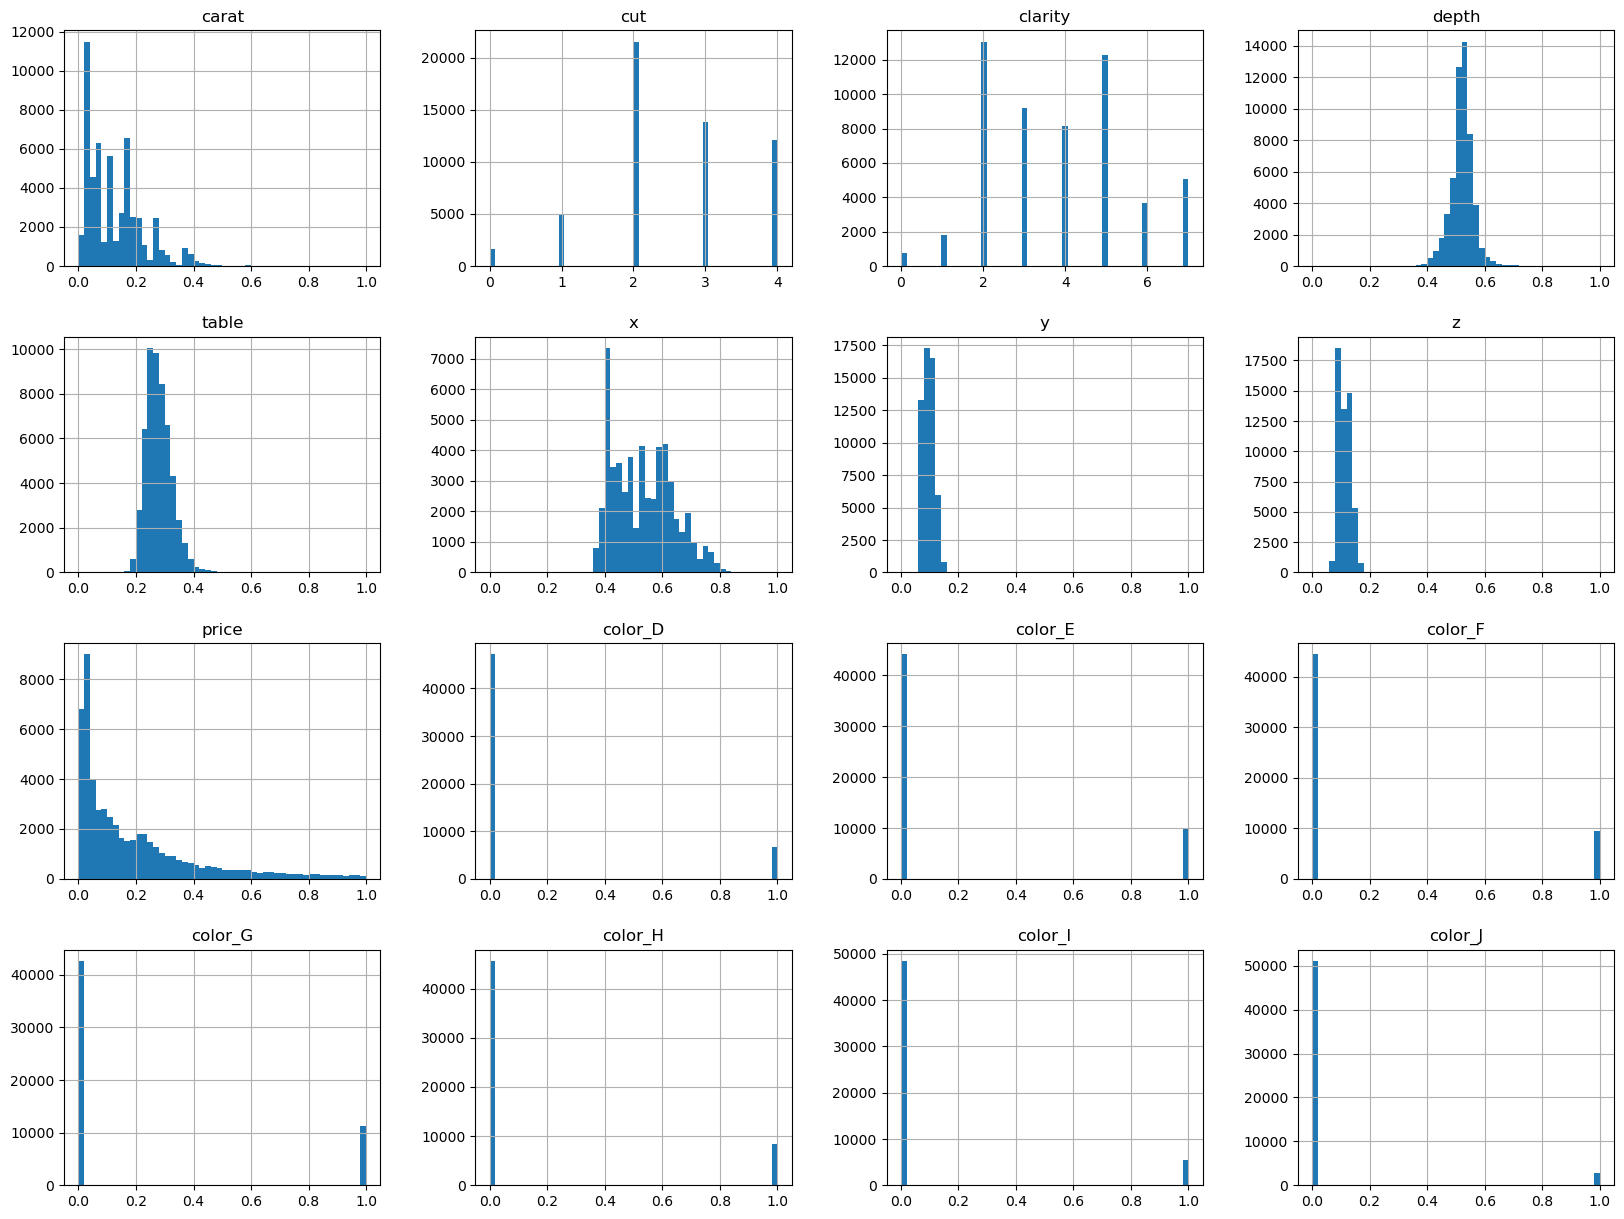

In [13]:
# histograpm of all df features

df.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
# printed correlation matrix of df features

corr = df.corr()
corr

,carat,cut,clarity,depth,table,x,y,z,price,color_D,color_E,color_F,color_G,color_H,color_I,color_J
carat,1.000000,0.017124,-0.214290,0.028224,0.181618,0.975094,0.951722,0.953387,0.921591,-0.112057,-0.139215,-0.060052,-0.029038,0.102465,0.161494,0.180054
cut,0.017124,1.000000,0.028235,-0.194249,0.150327,0.022342,0.027572,0.002037,0.039860,-0.005748,0.015826,-0.007127,-0.009822,0.005391,-0.002063,0.005373
clarity,-0.214290,0.028235,1.000000,-0.053080,-0.088223,-0.225721,-0.217616,-0.224263,-0.071535,-0.030691,0.025737,0.016030,0.063217,-0.049210,-0.024639,-0.028895
depth,0.028224,-0.194249,-0.053080,1.000000,-0.295779,-0.025289,-0.029341,0.094924,-0.010647,-0.013566,-0.028713,-0.017741,0.002768,0.026037,0.022630,0.022543
table,0.181618,0.150327,-0.088223,-0.295779,1.000000,0.195344,0.183760,0.150929,0.127134,-0.008921,0.007172,-0.004906,-0.038815,0.011574,0.017967,0.037253
x,0.975094,0.022342,-0.225721,-0.025289,0.195344,1.000000,0.974701,0.970772,0.884435,-0.106127,-0.134213,-0.048021,-0.024593,0.095896,0.146522,0.164658
y,0.951722,0.027572,-0.217616,-0.029341,0.183760,0.974701,1.000000,0.952006,0.865421,-0.103999,-0.130136,-0.046707,-0.024479,0.093480,0.142895,0.160776
z,0.953387,0.002037,-0.224263,0.094924,0.150929,0.970772,0.952006,1.000000,0.861249,-0.105216,-0.132210,-0.048803,-0.024582,0.095041,0.145276,0.164217
price,0.921591,0.039860,-0.071535,-0.010647,0.127134,0.884435,0.865421,0.861249,1.000000,-0.072473,-0.101089,-0.024161,0.008556,0.059223,0.097125,0.081710
color_D,-0.112057,-0.005748,-0.030691,-0.013566,-0.008921,-0.106127,-0.103999,-0.105216,-0.072473,1.000000,-0.178550,-0.175704,-0.195021,-0.161672,-0.126699,-0.088817


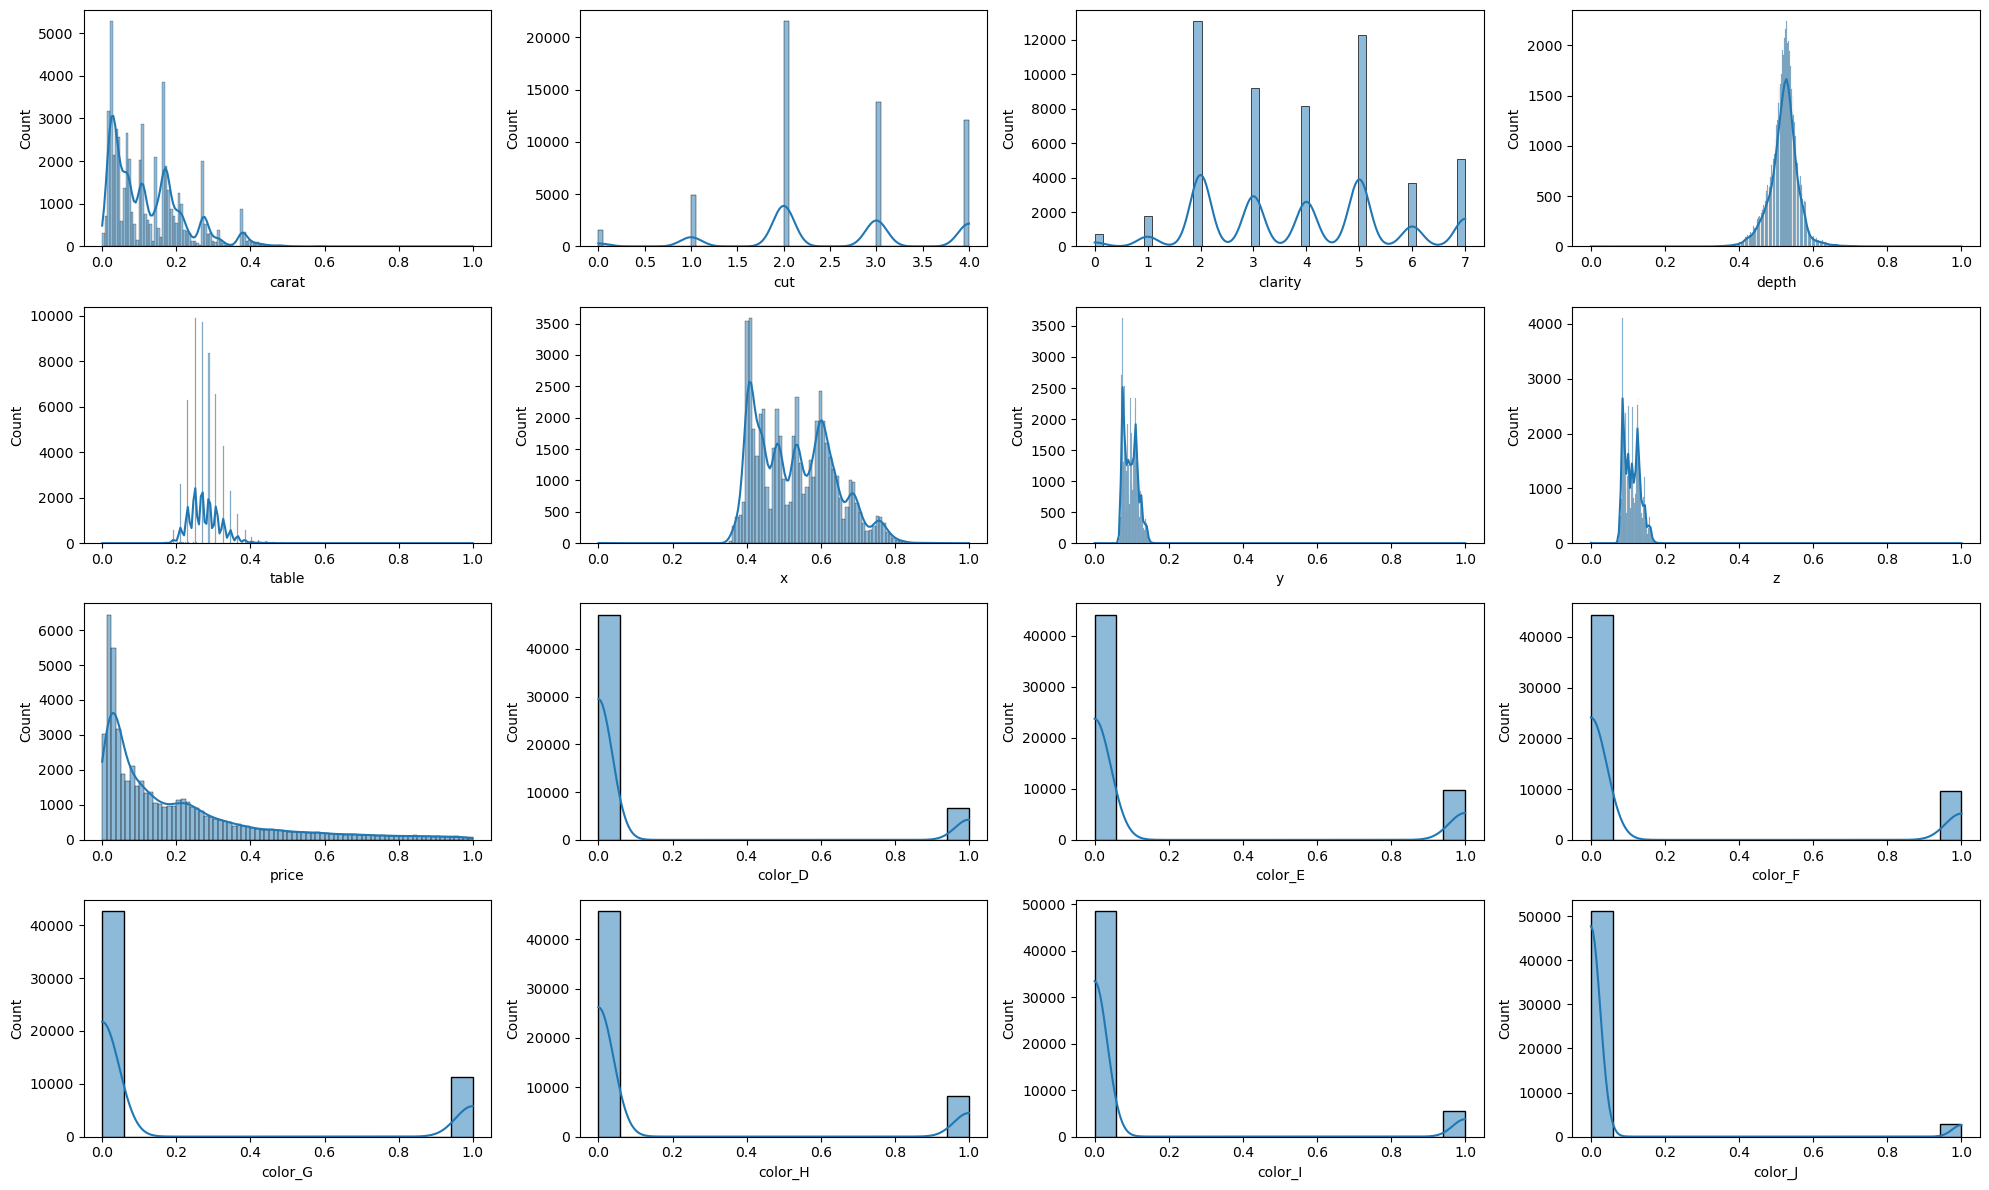

In [15]:
# histogram for feature counts in dataset

fig, axs = plt.subplots(4, 4, figsize=(20, 12))

for i, feature in enumerate(df.columns):
    row = i // 4 
    col = i % 4
    sns.histplot(df[feature], kde=True, ax=axs[row, col])

plt.tight_layout() 
plt.show()

<Axes: >

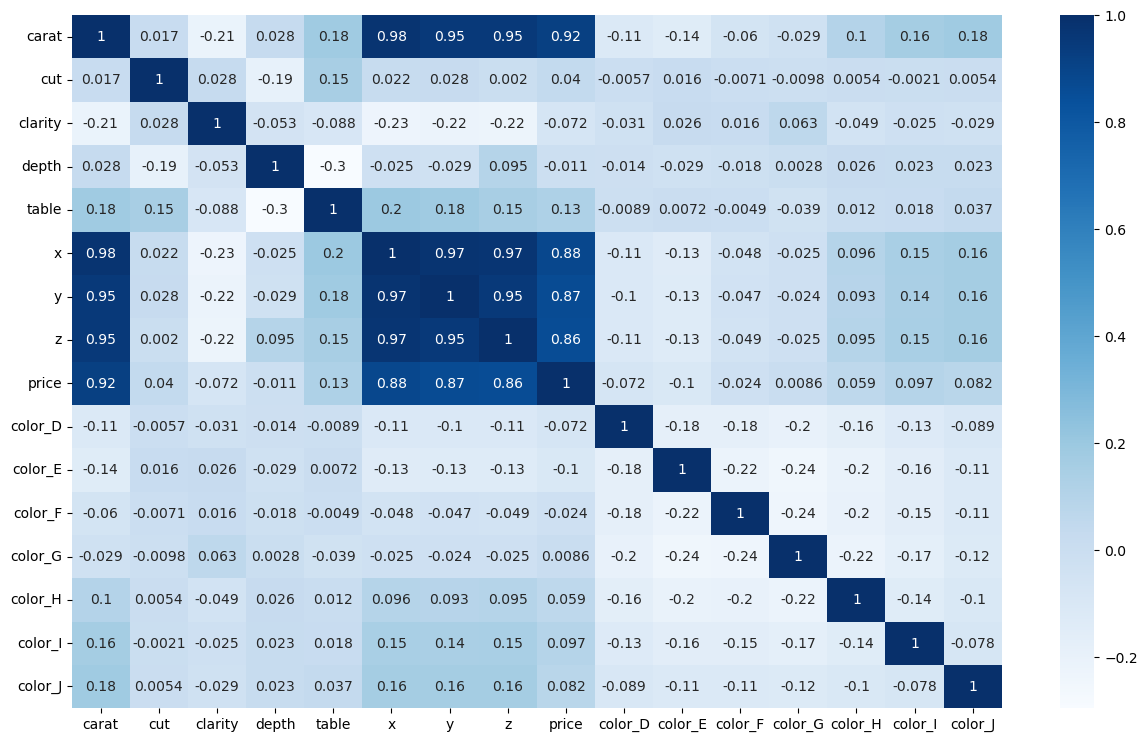

In [16]:
# heatmap for correlation matrix values

fig = plt.figure(figsize = (15,9))
sns.heatmap(corr, cmap='Blues', annot = True)

In [17]:
train_data = df.drop(['price'], axis=1) # drop target column from train
test_data = df['price'] # target column

x_train, x_test, y_train, y_test = train_test_split(train_data, test_data, test_size=0.3, random_state=309) #70 train 30 test

In [18]:
#linear regression

lr = LinearRegression()
lr.fit(x_train, y_train)

lr_start_time = time.time()
lr_score = lr.score(x_test, y_test)
lr_predict = lr.predict(x_test)
lr_end_time = time.time()

lr_mse = np.mean((lr.predict(x_test) - y_test) ** 2)
lr_rmse = math.sqrt(lr_mse)
lr_rse = np.sqrt(np.sum(np.square(lr.predict(x_test) - y_test)))
lr_mae = np.mean(np.abs(lr.predict(x_test) - y_test))
lr_execution_time = lr_end_time - lr_start_time

print("LR Predict: ", lr_predict)

LR Predict:  [ 0.13240051 -0.05595398  0.24571228 ...  0.19395447  0.15513611
 -0.00289917]


In [19]:
#k-neighbors regression

knr = KNeighborsRegressor()
knr.fit(x_train, y_train)

knr_start_time = time.time()
knr_score = knr.score(x_test, y_test)
knr_predict = knr.predict(x_test)
knr_end_time = time.time()

knr_mse = np.mean((knr.predict(x_test) - y_test) ** 2)
knr_rmse = math.sqrt(knr_mse)
knr_rse = np.sqrt(np.sum(np.square(lr.predict(x_test) - y_test)))
knr_mae = np.mean(np.abs(lr.predict(x_test) - y_test))
knr_execution_time = knr_end_time - knr_start_time

print("KNR Predict: ", knr_predict)

KNR Predict:  [0.08422988 0.01297508 0.26775153 ... 0.1635941  0.16614586 0.01985187]


In [20]:
#ridge regression

rr = Ridge()
rr.fit(x_train, y_train)

rr_start_time = time.time()
rr_score = rr.score(x_test, y_test)
rr_predict = rr.predict(x_test)
rr_end_time = time.time()

rr_mse = np.mean((rr.predict(x_test) - y_test) ** 2)
rr_rmse = math.sqrt(rr_mse)
rr_rse = np.sqrt(np.sum(np.square(rr.predict(x_test) - y_test)))
rr_mae = np.mean(np.abs(rr.predict(x_test) - y_test))
rr_execution_time = rr_end_time - rr_start_time

print("RR Predict: ", rr_predict)

RR Predict:  [ 0.13345411 -0.05835962  0.24846166 ...  0.1977973   0.16096628
 -0.00569941]


In [21]:
#decision tree regression

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

dtr_start_time = time.time()
dtr_score = dtr.score(x_test, y_test)
dtr_predict = dtr.predict(x_test)
dtr_end_time = time.time()

dtr_mse = np.mean((dtr.predict(x_test) - y_test) ** 2)
dtr_rmse = math.sqrt(dtr_mse)
dtr_rse = np.sqrt(np.sum(np.square(dtr.predict(x_test) - y_test)))
dtr_mae = np.mean(np.abs(dtr.predict(x_test) - y_test))
dtr_execution_time = dtr_end_time - dtr_start_time

print("RR Predict: ", dtr_predict)

RR Predict:  [0.08909553 0.00881224 0.2061956  ... 0.10828783 0.116181   0.01935449]


In [22]:
#random forest regression

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

rfr_start_time = time.time()
rfr_score = rfr.score(x_test, y_test)
rfr_predict = rfr.predict(x_test)
rfr_end_time = time.time()

rfr_mse = np.mean((rfr.predict(x_test) - y_test) ** 2)
rfr_rmse = math.sqrt(rfr_mse)
rfr_rse = np.sqrt(np.sum(np.square(rfr.predict(x_test) - y_test)))
rfr_mae = np.mean(np.abs(rfr.predict(x_test) - y_test))
rfr_execution_time = rfr_end_time - rfr_start_time

print("RR Predict: ", rfr_predict)

RR Predict:  [0.08571228 0.00885008 0.23514462 ... 0.1334903  0.1356447  0.01874358]


In [23]:
#gradient boosting regression

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

gbr_start_time = time.time()
gbr_score = gbr.score(x_test, y_test)
gbr_predict = gbr.predict(x_test)
gbr_end_time = time.time()

gbr_mse = np.mean((gbr.predict(x_test) - y_test) ** 2)
gbr_rmse = math.sqrt(gbr_mse)
gbr_rse = np.sqrt(np.sum(np.square(gbr.predict(x_test) - y_test)))
gbr_mae = np.mean(np.abs(gbr.predict(x_test) - y_test))
gbr_execution_time = gbr_end_time - gbr_start_time

print("RR Predict: ", gbr_predict)

RR Predict:  [0.08265664 0.00343387 0.25460159 ... 0.14266638 0.1606574  0.01772467]


In [24]:
#SGD regression

sgdr = SGDRegressor()
sgdr.fit(x_train, y_train)

sgdr_start_time = time.time()
sgdr_score = sgdr.score(x_test, y_test)
sgdr_predict = sgdr.predict(x_test)
sgdr_end_time = time.time()

sgdr_mse = np.mean((sgdr.predict(x_test) - y_test) ** 2)
sgdr_rmse = math.sqrt(sgdr_mse)
sgdr_rse = np.sqrt(np.sum(np.square(sgdr.predict(x_test) - y_test)))
sgdr_mae = np.mean(np.abs(sgdr.predict(x_test) - y_test))
sgdr_execution_time = sgdr_end_time - sgdr_start_time

print("RR Predict: ", sgdr_predict)

RR Predict:  [ 0.1522097  -0.05352319  0.26160818 ...  0.23558026  0.23126553
 -0.00791274]


In [25]:
#support vector regression (SVR)

svr = SVR()
svr.fit(x_train, y_train)

svr_start_time = time.time()
svr_score = svr.score(x_test, y_test)
svr_predict = svr.predict(x_test)
svr_end_time = time.time()

svr_mse = np.mean((svr.predict(x_test) - y_test) ** 2)
svr_rmse = math.sqrt(svr_mse)
svr_rse = np.sqrt(np.sum(np.square(svr.predict(x_test) - y_test)))
svr_mae = np.mean(np.abs(svr.predict(x_test) - y_test))
svr_execution_time = svr_end_time - svr_start_time

print("RR Predict: ", svr_predict)

RR Predict:  [ 0.12461157 -0.07714088  0.31038751 ...  0.18987212  0.21379994
 -0.03181773]


In [26]:
#linear SVR

lsvr = LinearSVR()
lsvr.fit(x_train, y_train)

lsvr_start_time = time.time()
lsvr_score = lsvr.score(x_test, y_test)
lsvr_predict = lsvr.predict(x_test)
lsvr_end_time = time.time()

lsvr_mse = np.mean((lsvr.predict(x_test) - y_test) ** 2)
lsvr_rmse = math.sqrt(lsvr_mse)
lsvr_rse = np.sqrt(np.sum(np.square(lsvr.predict(x_test) - y_test)))
lsvr_mae = np.mean(np.abs(lsvr.predict(x_test) - y_test))
lsvr_execution_time = lsvr_end_time - lsvr_start_time

print("RR Predict: ", lsvr_predict)

RR Predict:  [ 0.07520287 -0.02116357  0.23541584 ...  0.15730037  0.15083982
 -0.00085797]


In [27]:
#multi-layer perceptron regression

mlpr = MLPRegressor()
mlpr.fit(x_train, y_train)

mlpr_start_time = time.time()
mlpr_score = mlpr.score(x_test, y_test)
mlpr_predict = mlpr.predict(x_test)
mlpr_end_time = time.time()

mlpr_mse = np.mean((mlpr.predict(x_test) - y_test) ** 2)
mlpr_rmse = math.sqrt(mlpr_mse)
mlpr_rse = np.sqrt(np.sum(np.square(mlpr.predict(x_test) - y_test)))
mlpr_mae = np.mean(np.abs(mlpr.predict(x_test) - y_test))
mlpr_execution_time = mlpr_end_time - mlpr_start_time

print("RR Predict: ", mlpr_predict)

RR Predict:  [ 0.06739811 -0.00256128  0.25388129 ...  0.14480717  0.17188055
  0.02633699]


In [28]:
calculations = ['score', 'mse', 'rmse', 'rse', 'mae', 'extime'] # calculation types

results = {'lr':[lr_score, lr_mse, lr_rmse, lr_rse, lr_mae, lr_execution_time], 
           'knr':[knr_score, knr_mse, knr_rmse, knr_rse, knr_mae, knr_execution_time],
           'rr':[rr_score, rr_mse, rr_rmse, rr_rse, rr_mae, rr_execution_time],
           'dtr':[dtr_score, dtr_mse, dtr_rmse, dtr_rse, dtr_mae, dtr_execution_time],
           'rfr':[rfr_score, rfr_mse, rfr_rmse, rfr_rse, rfr_mae, rfr_execution_time],
           'gbr':[gbr_score, gbr_mse, gbr_rmse, gbr_rse, gbr_mae, gbr_execution_time],
           'sgdr':[sgdr_score, sgdr_mse, sgdr_rmse, sgdr_rse, sgdr_mae, sgdr_execution_time],
           'svr':[svr_score, svr_mse, svr_rmse, svr_rse, svr_mae, svr_execution_time],
           'lsvr':[lsvr_score, lsvr_mse, lsvr_rmse, lsvr_rse, lsvr_mae, lsvr_execution_time],
           'mlpr':[mlpr_score, mlpr_mse, mlpr_rmse, mlpr_rse, mlpr_mae, mlpr_execution_time]} # array of model results

results_df = pd.DataFrame(results, index=calculations).T.round(2) #convert to dataframe and round results to 2dp
results_df #print results

,score,mse,rmse,rse,mae,extime
lr,0.89,0.01,0.07,9.31,0.05,0.00
knr,0.96,0.00,0.04,9.31,0.05,0.92
rr,0.89,0.01,0.07,9.32,0.05,0.00
dtr,0.97,0.00,0.04,5.10,0.02,0.01
rfr,0.98,0.00,0.03,3.83,0.01,0.56
gbr,0.97,0.00,0.04,5.10,0.02,0.04
sgdr,0.85,0.01,0.08,10.78,0.06,0.00
svr,0.91,0.00,0.07,8.49,0.05,6.96
lsvr,0.86,0.01,0.08,10.24,0.04,0.00
mlpr,0.96,0.00,0.04,5.51,0.03,0.02
